In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [181]:
df = pd.read_csv('data/gender-classifier-DFE-791531.csv', encoding='latin-1')
df.sample(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
3332,815722628,False,finalized,3,10/27/15 2:01,female,1.0000,yes,1.0,7/23/11 9:12,...,https://pbs.twimg.com/profile_images/655879787...,0,65B0DA,The weather today = my heart,NaN,21499,10/26/15 12:40,6.587300e+17,NaN,Quito
4074,815723372,False,finalized,3,10/26/15 23:35,brand,0.6654,yes,1.0,4/24/13 9:19,...,https://pbs.twimg.com/profile_images/625972808...,0,FFFFFF,3 new unfollowers in the last day. Via https:/...,NaN,24161,10/26/15 12:40,6.587300e+17,The Netherlands,NaN
3479,815722775,False,finalized,3,10/27/15 1:02,male,1.0000,yes,1.0,2/23/14 14:47,...,https://pbs.twimg.com/profile_images/621366409...,0,C0DEED,"@pschiller Hey master, where's Beats Pill+ in ...",NaN,2667,10/26/15 12:40,6.587300e+17,NaN,Berlin
10712,815730081,False,finalized,3,10/27/15 1:31,brand,0.6732,yes,1.0,10/24/15 17:05,...,https://pbs.twimg.com/profile_images/658072493...,0,0,5 Fruits and Vegetables That Look Suspiciously...,NaN,215,10/26/15 13:20,6.587400e+17,"Follow her for inspiration,",NaN
5525,815724834,False,finalized,3,10/26/15 23:30,brand,0.6542,yes,1.0,3/1/14 6:32,...,https://pbs.twimg.com/profile_images/652373816...,0,0,I didn't come to play the game I just came to ...,NaN,8571,10/26/15 12:40,6.587300e+17,Chasin my Dreams!,Eastern Time (US & Canada)


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [183]:
df.shape

(20050, 26)

In [184]:
# Drop unnecessary columns/features
#data = df[df['profile_yn_gold'] == 'no']
column_to_drop = ['_unit_id','_last_judgment_at','user_timezone','tweet_coord','tweet_count','tweet_created',
                  'tweet_id','tweet_location','profileimage','created','_golden','_unit_state',
                  '_trusted_judgments','gender_gold']
df.drop(columns =column_to_drop, inplace=True, axis=1)
df.shape

(20050, 12)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 12 columns):
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
description              16306 non-null object
fav_number               20050 non-null int64
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text                     20050 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB


In [186]:
# df.groupby('gender').size()
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [187]:
drop_items_idx = df[df['gender'] == 'unknown'].index
df.drop(index = drop_items_idx, inplace = True)

df['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [188]:
print ('profile_yn information:\n',df['profile_yn'].value_counts())
# All of 97 instances with profile_yn == no are all NaN in gender
df[df['profile_yn'] == 'no']['gender']

profile_yn information:
 yes    18836
no        97
Name: profile_yn, dtype: int64


109      NaN
137      NaN
496      NaN
582      NaN
679      NaN
749      NaN
1179     NaN
1664     NaN
1698     NaN
1963     NaN
2118     NaN
2245     NaN
2272     NaN
2377     NaN
2537     NaN
2596     NaN
2717     NaN
2751     NaN
2765     NaN
2886     NaN
2980     NaN
3190     NaN
3195     NaN
3219     NaN
3337     NaN
3381     NaN
3553     NaN
3791     NaN
3942     NaN
4008     NaN
        ... 
12103    NaN
12889    NaN
13007    NaN
14045    NaN
15018    NaN
15243    NaN
15270    NaN
15428    NaN
15450    NaN
15740    NaN
15921    NaN
16208    NaN
16365    NaN
16640    NaN
16886    NaN
16991    NaN
17114    NaN
17163    NaN
18001    NaN
18048    NaN
18063    NaN
18070    NaN
18122    NaN
18136    NaN
18303    NaN
18524    NaN
18700    NaN
18840    NaN
19773    NaN
19842    NaN
Name: gender, Length: 97, dtype: object

In [189]:
drop_items_idx = df[df['profile_yn'] == 'no'].index
df.drop(index = drop_items_idx, inplace = True)
print (df['profile_yn'].value_counts())
# Drop not-required columns
df.drop(columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)
df.shape


yes    18836
Name: profile_yn, dtype: int64


(18836, 9)

In [198]:
gender_dic = dict(df['gender'].value_counts())


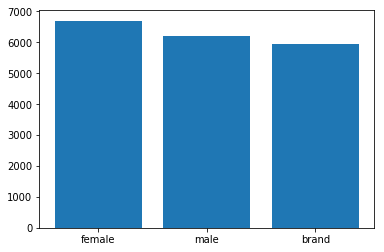

In [200]:
plt.bar(range(len(gender_dic)), list(gender_dic.values()), align='center')
plt.xticks(range(len(gender_dic)), list(gender_dic.keys()))
plt.show()